In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Train DataFrame shape: (1022, 81)
Test DataFrame shape: (438, 81)


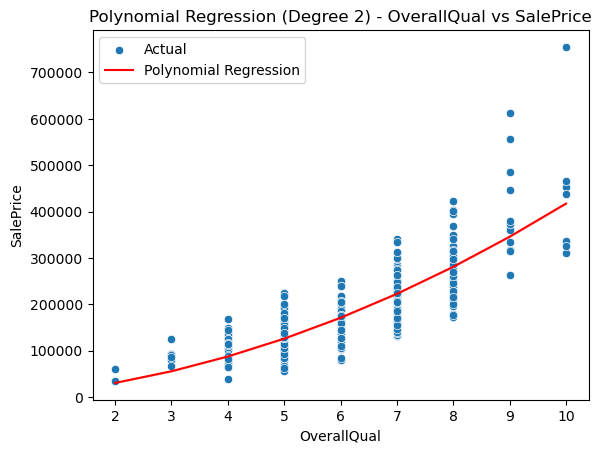

In [3]:
# Assuming you have already defined getPrediction and getRelativeError functions
all_df = pd.read_csv('train.csv')

# Split the data into training (70%) and testing (30%) sets
train_df, df = train_test_split(all_df, test_size=0.3, random_state=42)

# Display the shapes of the two datasets
print("Train DataFrame shape:", train_df.shape)
print("Test DataFrame shape:", df.shape)

# Select predictor variable ("OverallQual") and target variable ("SalePrice")
X = df['OverallQual']
y = df['SalePrice']

# Polynomial regression function
def polynomial_regression(X, y, degree):
    # Create a matrix of powers for X up to the specified degree
    X_powers = np.column_stack([X**i for i in range(1, degree+1)])

    # Solve for coefficients using normal equation
    coefficients = np.linalg.inv(X_powers.T @ X_powers) @ X_powers.T @ y.values

    return coefficients

# Polynomial prediction function
def predict_polynomial(X, coefficients):
    return sum(coeff * X**i for i, coeff in enumerate(coefficients, start=1))

# Degree of the polynomial regression
degree = 2  # You can change this to the desired degree

# Get coefficients for polynomial regression
coefficients = polynomial_regression(X, y, degree)

# Generate predictions using the polynomial regression
predictions = predict_polynomial(X, coefficients)

# Create a new DataFrame for charting
poly_regression_df = pd.DataFrame({'OverallQual': X, 'SalePrice': y, 'Predicted': predictions})

# Plot the data points and the polynomial regression curve
sns.scatterplot(data=poly_regression_df, x='OverallQual', y='SalePrice', label='Actual')
sns.lineplot(data=poly_regression_df, x='OverallQual', y='Predicted', color='red', label='Polynomial Regression')
plt.title(f'Polynomial Regression (Degree {degree}) - OverallQual vs SalePrice')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.legend()
plt.show()
